# Battle of Neighborhood - Week 2

**Importing necessary libraries for assignment**

In [326]:
#Import necessary libraries for data analysis
import numpy as np  
import pandas as pd  
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

# library to handle JSON files
import json  
from pandas.io.json import json_normalize

# convert an address into latitude and l ongitude values
!pip install geopy 
from geopy.geocoders import Nominatim  

# library to handle requests
import requests  
 
# Matplotlib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
import seaborn as sns
import matplotlib.pyplot as plt

#import folium # map rendering library 
!pip install folium 
import folium 

print('Libraries imported successfully!')

Libraries imported successfully!


**Scrape the Wikipedia page "https: //en.wikipedia .org/wiki/List_of_postal_codes_of_Canada:_M" using BeautifulSoup methodolog**

In [327]:
#Using Beautiful Soup to scrape Wikipedia page 

# import the library, indicate url and access the info in free format  
import urllib.request 
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' 
page = urllib.request.urlopen(url) 
from bs4 import BeautifulSoup 
soup = BeautifulSoup(page, "lxml") 
all_tables=soup.find_all("table") 
right_table=soup.find('table', class_='wikitable sortable') 

# loop through the rows to obtain the necessary info 
A=[] 
B=[] 
C=[] 
for row in right_table.findAll('tr'):    
    cells=row.findAll('td')    
    if len(cells)==3:        
        A.append(cells[0].find(text=True))        
        B.append(cells[1].find(text=True))        
        C.append(cells[2].find(text=True))   

# intruce pandas and dataframe and display the first few rows 
df=pd.DataFrame(A,columns=['Postal Code']) 
df['Borough']=B 
df['Neighborhood']=C 
df.head()

Postal Code             Borough                 Neighborhood
0       M1A\n      Not assigned\n               Not assigned\n
1       M2A\n      Not assigned\n               Not assigned\n
2       M3A\n        North York\n                  Parkwoods\n
3       M4A\n        North York\n           Victoria Village\n
4       M5A\n  Downtown Toronto\n  Regent Park, Harbourfront\n

**Postal code data preprocessing**

In [328]:
# clean the data to remove the "\n" sign from columns

df['Postal Code'] = df['Postal Code'].replace('\n','', regex=True) 
df['Borough'] = df['Borough'].replace('\n','', regex=True) 
df['Neighborhood'] = df['Neighborhood'].replace('\n','', regex=True) 
df.head(5)

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [329]:
#df.shape

In [330]:
# Remove unassigned Boroughs from the list 

index=df[df['Borough']=='Not assigned'].index 
df.drop(index,inplace=True) 
df.reset_index(drop=True,inplace=True) 
print('Output for section 1 of assignment:') 
df.head()

Output for section 1 of assignment:


Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

**Obtain the geographical coordinates of each postal code using the following csv file: http:// cocl.us/ Geospatial_data**

In [331]:
# Use the Geospatial data provided by instructors in previous lab

postal_code = "http://cocl.us/Geospatial_data" 
df_PC = pd.read_csv(postal_code) 
df_PC.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

**Merge the two data frame to obtained the desired format**

In [332]:
# Merge the two dataframes to obtain the main output

neighborhoods = pd.merge(df, df_PC, on='Postal Code', how='inner') 
neighborhoods.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [333]:
# Obtain necessary info about the data

#ID how many boroughs in the file
print('The Neighborhoods dataframe has {} boroughs and {} neighborhoods.'.format(
    len(neighborhoods['Borough'].unique()),        
    neighborhoods.shape[0]    
    ) 
)

#obtain shape of the data
neighborhoods.shape

The Neighborhoods dataframe has 10 boroughs and 103 neighborhoods.


(103, 5)

**Obtain geographical location of Toronto and areas around it**

In [334]:
# Obtain latitude and longitude of our toronto_df dataframe 
address = 'toronto, ON' 
geolocator = Nominatim(user_agent="to_explorer") 
location = geolocator.geocode(address) 
latitude = location.latitude 
longitude = location.longitude 
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


**Create a map of Toronto area for better visualization**

In [335]:
# create map of Toronto using latitude and longitude values 
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map 
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods[ 'Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):    
    label = '{}, {}'.format(neighborhood, borough)    
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],        
        radius=5,        
        popup=label,        
        color='green',        
        fill=True,        
        fill_color='#3186cc',        
        fill_opacity=0.9,        
        parse_html=False).add_to(map_toronto)      
map_toronto

**Define Foursquare Credentials and Version**

In [336]:
CLIENT_ID = '0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP' # my Foursquare ID 
CLIENT_SECRET = 'LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF' # my Foursq uare Secret 
VERSION = '20180605' # Foursquare API version 
LIMIT = 100 # A default Foursquare API limit value 
print('Your credentails:') 
print('CLIENT_ID: ' + CLIENT_ID) 
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP
CLIENT_SECRET:LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF


**Explore Toronto - Develop a function to search each neighborhood and create a new dataframe for Toronto venues**

In [337]:
 # Define criteria 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit # of venues 
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return info for available venues
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [338]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                latitudes=neighborhoods['Latitude'],
                                longitudes=neighborhoods['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

**Check dataframe and visualize the data**

In [339]:
 # Display first few rows of all venues in our dataframe
toronto_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                               Venue  Venue Latitude  Venue Longitude  \
0                    Brookbanks Park       43.751976       -79.332140   
1                      Variety Store       43.751974       -79.333114   
2  Corrosion Service Company Limited       43.752432       -79.334661   
3             Victoria Village Arena       43.723481       -79.315635   
4                          Portugril       43.725819       -79.312785   

               Venue Category  
0                        Park  
1           Food & Drink Shop  
2  Construction & Landscaping  
3                Hockey Arena  
4       Portuguese Restaurant

In [340]:
# Group the dataframe by Neighborhood
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               5   
Alderwood, Long Branch                                                  8   
Bathurst Manor, Wilson Heights, Downsview North                        22   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      25   
Berczy Park                                                            56   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           22   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Caledonia-Fairbanks                                                     4   
Canada Post Gateway Processing Centre                                  15   
Cedarbrae                                                               8   
Central Bay Street                                                     62   
Christie                                                               16   
Church and Wellesley                                                   79   
Clarks Corners, Tam O'Shanter, Sullivan                                14   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             36   
Davisville North                                                        9   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills                                                              24   
Dorset Park, Wexford Heights, Scarborough Town ...                      6   
Downsview                                                              15   
Dufferin, Dovercourt Village                                           15   
East Toronto, Broadview North (Old East York)                           2   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      7   
Fairview, Henry Farm, Oriole                                           66   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                              100   
Glencairn                                                               4   
Golden Mile, Clairlea, Oakridge                                         9   
Guildwood, Morningside, West Hill                                       8   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          26   
Hillcrest Village                                                       5   
Humber Summit                                                           3   
Humberlea, Emery                                                        3   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         20   
Kennedy Park, Ionview, East Birchmount Park                             6   
Kensington Market, Chinatown, Grange Park                              62   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                                       15   
Lawrence Park                                                           4   
Leaside                                                                32   
Little Portugal, Trinity                                               43   
Malvern, Rouge                                                          1   
Milliken, Agincourt North, Steeles East, L'Amor.

In [341]:
# Display how may unique categories do we have in our dataframe
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


**Explore the dataframe to identify top 10 venues; confirming Pizza Place is a frequent venue**

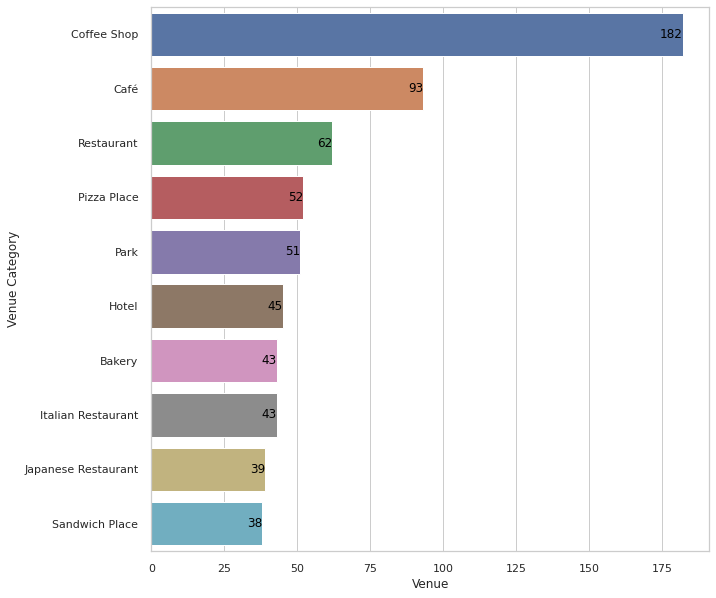

In [342]:
#Group the dataframe by Venue categories and get the frequency of each venue
top10_venues=toronto_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)[:10].to_frame().reset_index()

#Plot bar chart
sns.set(style="whitegrid") # Initialize the matplotlib figure 
plt.subplots(figsize=(10,10)) 
ax = sns.barplot(x='Venue', y='Venue Category', data=top10_venues) #ax.annotate(x='Venue') 
for p in ax.patches: 
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), fontsize=12, color='black', ha='right', va='center')

*Chart suggests Pizza Place is one of the top 5 venues actually, so this is a great opportunity to open up a Pizza shop. Now the question is where?*

**Let's analyze each neighborhood in our toronto_df dataframe**

In [343]:
# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to datafram
to_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

# Visualize data and obtain necessary info
print(to_onehot.shape)
to_onehot.head()

(2119, 273)


Yoga Studio  Accessories Store  Adult Boutique  Airport  \
0            0                  0               0        0   
1            0                  0               0        0   
2            0                  0               0        0   
3            0                  0               0        0   
4            0                  0               0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    0               0                 0                 0   
2     0    0               0                 0                 0   
3     0    0               0                 0                 0   
4     0    0               0                 0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  Bistro  \
0                   0                         0          0       0   
1                   0                         0          0       0   
2                   0                         0          0       0   
3                   0                         0          0       0   
4                   0                         0          0       0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0              0          0         0                     0               0   
1              0          0         0                     0               0   
2              0          0         0                     0               0   
3              0          0         0                     0               0   
4              0          0         0                     0               0   

   Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint

**Leverage one hot encoding to group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [344]:
to_grouped = to_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 273)


Neighborhood  Yoga Studio  \
0                                        Agincourt          0.0   
1                           Alderwood, Long Branch          0.0   
2  Bathurst Manor, Wilson Heights, Downsview North          0.0   
3                                  Bayview Village          0.0   
4                Bedford Park, Lawrence Manor East          0.0   

   Accessories Store  Adult Boutique  Airport  Airport Food Court  \
0                0.0             0.0      0.0                 0.0   
1                0.0             0.0      0.0                 0.0   
2                0.0             0.0      0.0                 0.0   
3                0.0             0.0      0.0                 0.0   
4                0.0             0.0      0.0                 0.0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0           0.0             0.0              0.0               0.0   
1           0.0             0.0              0.0               0.0   
2           0.0             0.0              0.0               0.0   
3           0.0             0.0              0.0               0.0   
4           0.0             0.0              0.0               0.0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                 0.00           0.0       0.0          0.0         0.0   
1                 0.00           0.0       0.0          0.0         0.0   
2                 0.00           0.0       0.0          0.0         0.0   
3                 0.00           0.0       0.0          0.0         0.0   
4                 0.04           0.0       0.0          0.0         0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                  0.0               0.0                 0.0          0.0   
1                  0.0               0.0                 0.0          0.0   
2                  0.0               0.0                 0.0          0.0   
3                  0.0               0.0                 0.0          0.0   
4                  0.0               0.0                 0.0          0.0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery      Bank  Bar  \
0            0.0        0.0         0.0         0.0     0.0  0.000000  0.0   
1            0.0        0.0         0.0         0.0     0.0  0.000000  0.0   
2            0.0        0.0         0.0         0.0     0.0  0.090909  0.0   
3            0.0        0.0         0.0         0.0     0.0  0.250000  0.0   
4            0.0        0.0         0.0         0.0     0.0  0.000000  0.0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0             0.0               0.0               0.0                 0.0   
1             0.0               0.0               0.0                 0.0   
2             0.0               0.0               0.0                 0.0   
3             0.0               0.0               0.0                 0.0   
4             0.0               0.0               0.0                 0.0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0    0.0              0.0       0.0         0.0                 0.0   
1    0.0              0.0       0.0         0.0                 0.0   
2    0.0              0.0       0.0         0.0                 0.0   
3    0.0              0.0       0.0         0.0                 0.0   
4    0.0              0.0       0.0         0.0                 0.0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Boat or Ferry  Bookstore  \
0                       0.0        0.0     0.0            0.0        0.0   
1                       0.0        0.0     0.0            0.0        0.0   
2                       0.0        0.0     0.0            0.0        0.0   
3                       0.0        0.0     0.0            0.0        0.0   
4                       0.0        0.0     0.0            0.0        0.0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Sh

In [345]:
target_res_df = to_grouped[["Neighborhood","Pizza Place"]]
target_res_df.head() #.head() shows the first five rows only


Neighborhood  Pizza Place
0                                        Agincourt     0.000000
1                           Alderwood, Long Branch     0.250000
2  Bathurst Manor, Wilson Heights, Downsview North     0.045455
3                                  Bayview Village     0.000000
4                Bedford Park, Lawrence Manor East     0.080000

**Cluster available neighborhoods**

In [346]:
#Import necessary libraries for clustering
from sklearn.cluster import KMeans
import warnings 
from sklearn.cluster import AffinityPropagation
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import ClusteringScoreVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

Solving environment: done

# All requested packages already installed.



In [347]:
to_grouped_clustering = to_grouped.drop('Neighborhood', 1)

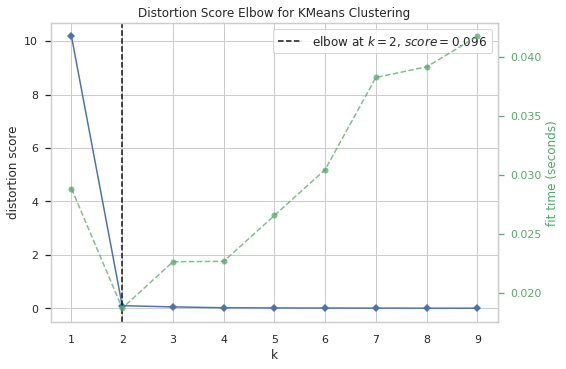

In [373]:
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10))
visualizer.fit(to_grouped_clustering)
visualizer.poof()

*The graph suggests we can divide neighborhoods into 3 clusters*

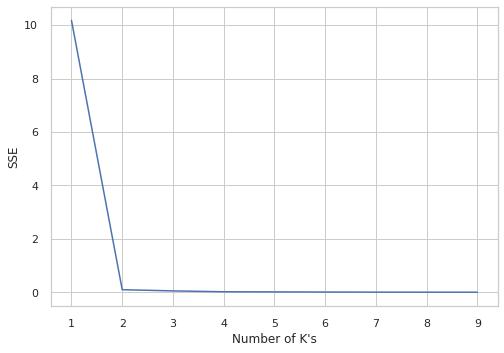

In [374]:
sse={}
for k in range(1,10):
    kmeans=KMeans(n_clusters=k).fit(to_grouped_clustering)
    to_grouped_clustering["Clusters"]=kmeans.labels_
    sse[k]=kmeans.inertia_

plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of K's")
plt.ylabel("SSE")
plt.show()

**Looking at the figure above, it suggests that we would cluster Toronto neighborhoods into 3 clusters as identified above**

In [375]:
kclusters = 2

to_grouped_clustering = target_res_df.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(to_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Create a new dataframe with clusters of Toronto neighborhood as well as top venues**

In [376]:
# create a new dataframe that includes the cluster as well as all the venues for each neighborhood. 
to_merged = target_res_df.copy() 

# add clustering labels 
to_merged["Cluster Labels"] = kmeans.labels_ 

# display the merged dataframe
to_merged.head()

Neighborhood  Pizza Place  \
0                                        Agincourt     0.000000   
1                           Alderwood, Long Branch     0.250000   
2  Bathurst Manor, Wilson Heights, Downsview North     0.045455   
3                                  Bayview Village     0.000000   
4                Bedford Park, Lawrence Manor East     0.080000   

   Cluster Labels  
0               0  
1               1  
2               0  
3               0  
4               0

In [377]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")


print(to_merged.shape)
to_merged.head()

(2119, 9)


Neighborhood  Pizza Place  Cluster Labels  Neighborhood Latitude  \
0    Agincourt          0.0               0                43.7942   
0    Agincourt          0.0               0                43.7942   
0    Agincourt          0.0               0                43.7942   
0    Agincourt          0.0               0                43.7942   
0    Agincourt          0.0               0                43.7942   

   Neighborhood Longitude                        Venue  Venue Latitude  \
0              -79.262029  Panagio's Breakfast & Lunch       43.792370   
0              -79.262029                El Pulgarcito       43.792648   
0              -79.262029                     Twilight       43.791999   
0              -79.262029                       Mark's       43.791179   
0              -79.262029              Commander Arena       43.794867   

   Venue Longitude             Venue Category  
0       -79.260203             Breakfast Spot  
0       -79.259208  Latin American Restaurant  
0       -79.258584                     Lounge  
0       -79.259714             Clothing Store  
0       -79.267989               Skating Rink

In [378]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

(2119, 9)


Neighborhood  Pizza Place  Cluster Labels  \
0                  Agincourt     0.000000               0   
64  Richmond, Adelaide, King     0.020833               0   
64  Richmond, Adelaide, King     0.020833               0   
64  Richmond, Adelaide, King     0.020833               0   
64  Richmond, Adelaide, King     0.020833               0   

    Neighborhood Latitude  Neighborhood Longitude  \
0               43.794200              -79.262029   
64              43.650571              -79.384568   
64              43.650571              -79.384568   
64              43.650571              -79.384568   
64              43.650571              -79.384568   

                                     Venue  Venue Latitude  Venue Longitude  \
0              Panagio's Breakfast & Lunch       43.792370       -79.260203   
64                John & Sons Oyster House       43.650656       -79.381613   
64                      M Square Coffee Co       43.651218       -79.383555   
64  Lobby Lounge at the Shangri-La Toronto       43.649155       -79.386546   
64                        Downtown Toronto       43.653232       -79.385296   

        Venue Category  
0       Breakfast Spot  
64  Seafood Restaurant  
64         Coffee Shop  
64              Lounge  
64        Neighborhood

**Identify how many total Pizza Place we can find in our clusters**

In [379]:
to_merged['Venue Category'].value_counts()['Pizza Place']

52

**Create a map and observe the clusters!**

In [380]:
# create map
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(toronto_map)
       
toronto_map

**Examine Clusters**

In [381]:
target_res_df["Cluster Labels"] = kmeans.labels_
target_res_df.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Neighborhood  Pizza Place  \
0                                          Agincourt     0.000000   
1                             Alderwood, Long Branch     0.250000   
2    Bathurst Manor, Wilson Heights, Downsview North     0.045455   
3                                    Bayview Village     0.000000   
4                  Bedford Park, Lawrence Manor East     0.080000   
5                                        Berczy Park     0.000000   
6                        Birch Cliff, Cliffside West     0.000000   
7       Brockton, Parkdale Village, Exhibition Place     0.000000   
8  Business reply mail Processing Centre, South C...     0.062500   
9  CN Tower, King and Spadina, Railway Lands, Har...     0.000000   

   Cluster Labels  
0               0  
1               1  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0

**Let's examine Cluster 1**

In [382]:
df_cluster1=to_merged.loc[to_merged['Cluster Labels'] == 0, to_merged.columns[[0] + list(range(1, to_merged.shape[1]))]] 
df_cluster1.head()

Neighborhood  Pizza Place  Cluster Labels  \
0                  Agincourt     0.000000               0   
64  Richmond, Adelaide, King     0.020833               0   
64  Richmond, Adelaide, King     0.020833               0   
64  Richmond, Adelaide, King     0.020833               0   
64  Richmond, Adelaide, King     0.020833               0   

    Neighborhood Latitude  Neighborhood Longitude  \
0               43.794200              -79.262029   
64              43.650571              -79.384568   
64              43.650571              -79.384568   
64              43.650571              -79.384568   
64              43.650571              -79.384568   

                                     Venue  Venue Latitude  Venue Longitude  \
0              Panagio's Breakfast & Lunch       43.792370       -79.260203   
64                John & Sons Oyster House       43.650656       -79.381613   
64                      M Square Coffee Co       43.651218       -79.383555   
64  Lobby Lounge at the Shangri-La Toronto       43.649155       -79.386546   
64                        Downtown Toronto       43.653232       -79.385296   

        Venue Category  
0       Breakfast Spot  
64  Seafood Restaurant  
64         Coffee Shop  
64              Lounge  
64        Neighborhood

**Now let's look at Cluster 2**

In [383]:
df_cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1, to_merged.columns[[0] + list(range(1, to_merged.shape[1]))]] 
df_cluster2.head()

Neighborhood  Pizza Place  \
20                                   Davisville North     0.111111   
71  South Steeles, Silverstone, Humbergate, Jamest...     0.200000   
20                                   Davisville North     0.111111   
71  South Steeles, Silverstone, Humbergate, Jamest...     0.200000   
38                                      Humber Summit     0.333333   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
20               1              43.712751              -79.390197   
71               1              43.739416              -79.588437   
20               1              43.712751              -79.390197   
71               1              43.739416              -79.588437   
38               1              43.756303              -79.565963   

                                 Venue  Venue Latitude  Venue Longitude  \
20  900 Mount Pleasant - Residents Gym       43.711671       -79.391767   
71                  Shoppers Drug Mart       43.741685       -79.584487   
20            Provocative Pizza Series       43.708293       -79.389546   
71                              Subway       43.742645       -79.589643   
38                   Islington & Finch       43.754646       -79.568638   

          Venue Category  
20  Gym / Fitness Center  
71              Pharmacy  
20           Pizza Place  
71        Sandwich Place  
38          Intersection

**Let's see how many Pizza Places do we have per given cluster**

In [384]:
# number of Pizza places per cluster
print('Number of Pizza Places in cluster 1 are ',df_cluster1['Venue Category'].value_counts(ascending=False)['Pizza Place'])
print('Number of Pizza Places in cluster 2 are ',df_cluster2['Venue Category'].value_counts(ascending=False)['Pizza Place'])

Number of Pizza Places in cluster 1 are  37
Number of Pizza Places in cluster 2 are  15


*It seems cluster 2 has almost twice as many pizza stores as cluster 1. It may be a bit challenging to enter the market; specially when we are introducing an authentic pizza shop. There will be competitions, franchisees, etc. It may be a smarter move to select an area in cluster 1.

*However, the question is where exactly would we want to open up a pizza shop in cluster 1?

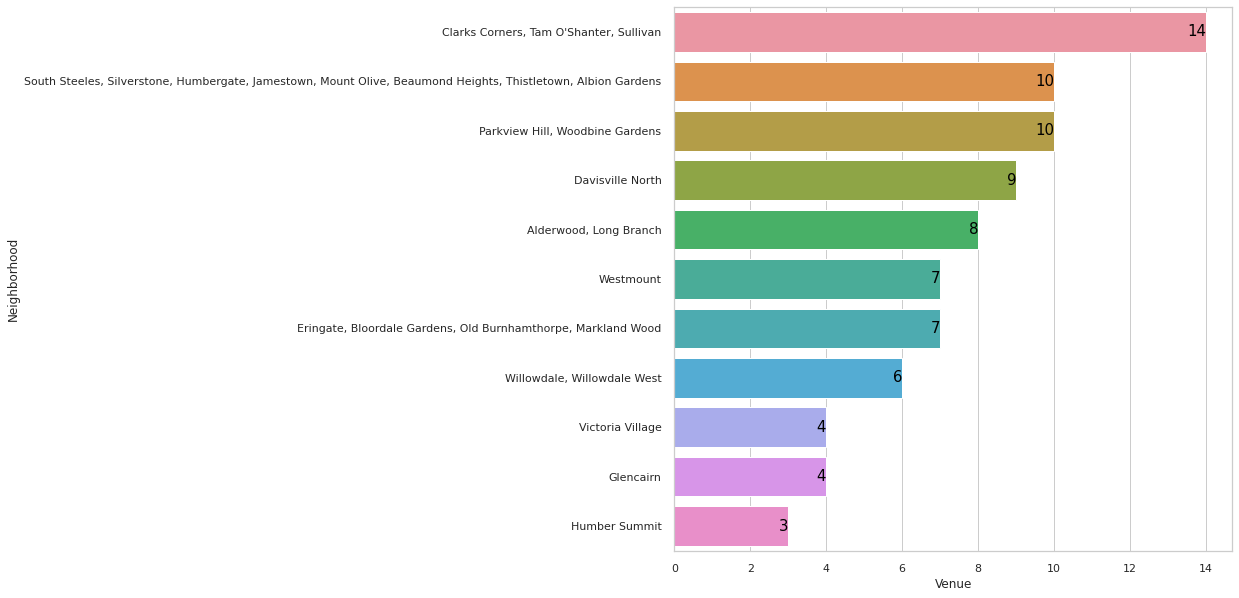

In [385]:
# Check top 20 most frequently occuring retaurant type
Pizza2=df_cluster2.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)[:18].to_frame().reset_index()

sns.set(style="whitegrid") # Initialize the matplotlib figure 
plt.subplots(figsize=(10,10)) 
ax = sns.barplot(x='Venue', y='Neighborhood', data=Pizza2) #ax.annotate(x='Venue') 
for p in ax.patches: 
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), fontsize=15, color='black', ha='right', va='center')
